## Problem Statement:
 **This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success

## Input features: 
    
     Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, Complete Games and Errors

## Output: 
    Number of predicted wins (W)

Importing the required libraries for the dataset

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

Loading the given dataset

In [2]:
bb = pd.read_csv("baseball.csv")
bb

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [3]:
# Shape of the dataset r * c. We can see there are 30 rows and 17 columns present in this dataset

bb.shape

(30, 17)

The info() function will give the information about each column datatype,memory usage, non null count,index.

In [4]:
bb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


* describe() will describe about each and every column mean value, standard deviation, count of values, quantile % range of (25,50,75) the data.

* This will help us to understand the data in a better way for the initial analysis of the dataset.

In [5]:
bb.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


checking null values present in the dataset or not using isnull() function and sum() will add the count of null values present in column.

this helps us to do further analysis on missing data if any.

In [6]:
bb.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

As there is no null values and dataset is clean, We may have outliers on some columns as per the describe table

Let's see how the data has been distributed through visualization techniques,

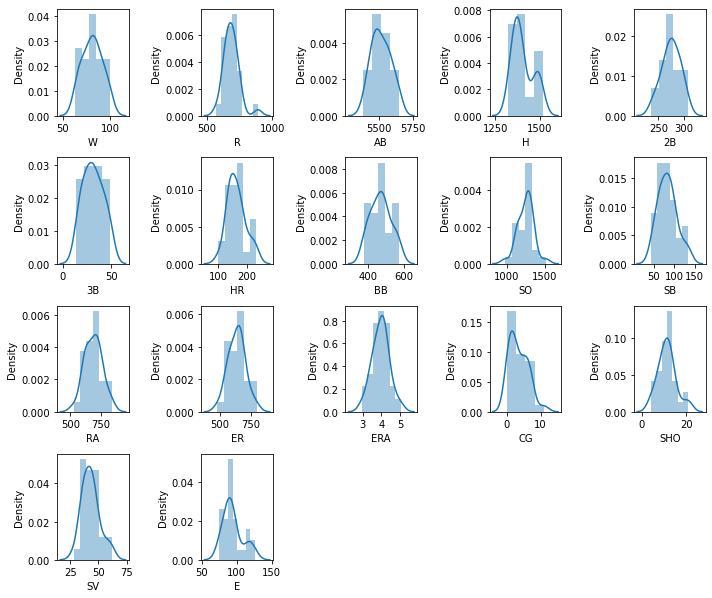

In [8]:
plt.figure(figsize = (10,10))
pltnumber = 1

for column in bb:
    if pltnumber<=17:
        ax = plt.subplot(5,5,pltnumber)
        sns.distplot(bb[column])
        plt.xlabel(column,fontsize=10)
        pltnumber+=1
plt.tight_layout()

As the dataset looks cleaned and some columns like E, CG,R and all having outliers/skewness.

Let's confirm that using Boxplot visualization,

    * We can see that some columns do have outliers and we will try to remove these outliers using Z-score method()

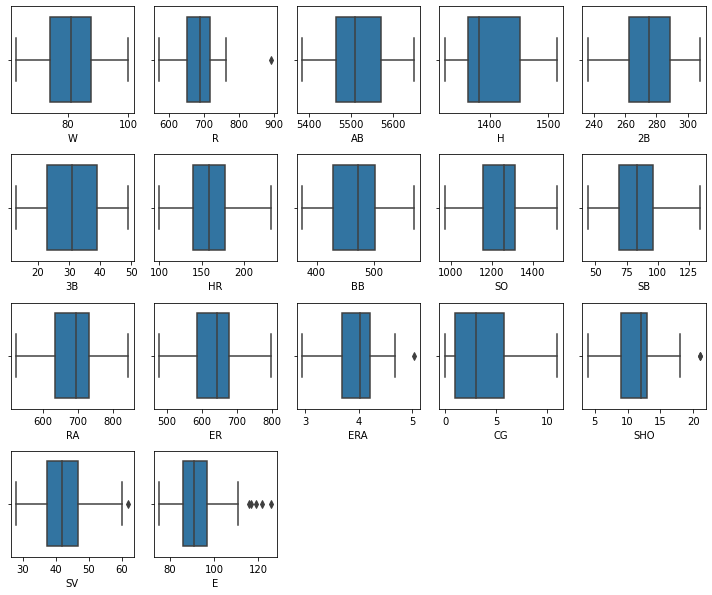

In [9]:
plt.figure(figsize = (10,10))
pltnumber = 1

for column in bb:
    if pltnumber<=17:
        ax = plt.subplot(5,5,pltnumber)
        sns.boxplot(bb[column])
        plt.xlabel(column,fontsize=10)
        pltnumber+=1
plt.tight_layout()

After applying Zscore Method, we are losing around 3% data and we will chek the skewness if any and if it is, we will see how to handle that as well

In [10]:
from scipy.stats import zscore

z = np.abs(zscore(bb))
threshold = 3
df = bb[(z<3).all(axis = 1)]

print("shape before and after")
print("shape before" .ljust(20),":",bb.shape)
print("shape after" .ljust(20),":",df.shape)
print("% loss" .ljust(20),":",((bb.shape[0]-df.shape[0])/bb.shape[0])*100)

shape before and after
shape before         : (30, 17)
shape after          : (29, 17)
% loss               : 3.3333333333333335


In [11]:
df.skew()

W      0.119013
R     -0.215364
AB     0.169573
H      0.783772
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
CG     0.854980
SHO    0.526943
SV     0.627480
E      0.840271
dtype: float64

We can see that skewness exist in some cols after treated outliers and removing them using cuberoot function().

In [12]:
df[['H','E']] = df[['H','E']].apply(np.cbrt)

In [13]:
df.skew()

W      0.119013
R     -0.215364
AB     0.169573
H      0.753696
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
CG     0.854980
SHO    0.526943
SV     0.627480
E      0.671748
dtype: float64

Now through the distplot(), we can see that data is pretty good and we will proceed with  further steps,

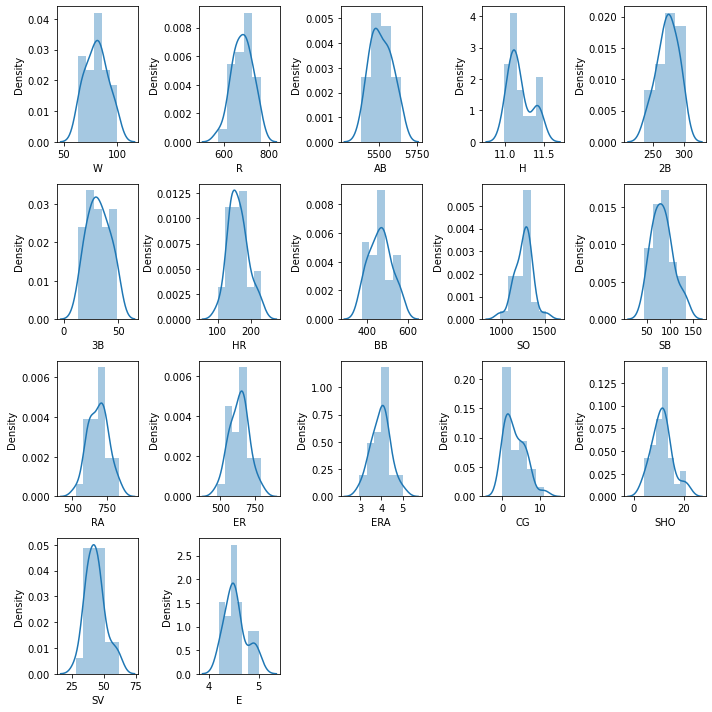

In [14]:
plt.figure(figsize = (10,10))
pltnumber = 1

for column in df:
    if pltnumber<=17:
        ax = plt.subplot(4,5,pltnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=10)
        pltnumber+=1
plt.tight_layout()

Checking the correlation between features VS features or features VS target,

We can see that col ERA, RA,ER is having high correlated with each other and ERA is having correlation with target variable as well.

So let's drop the column of ERA.

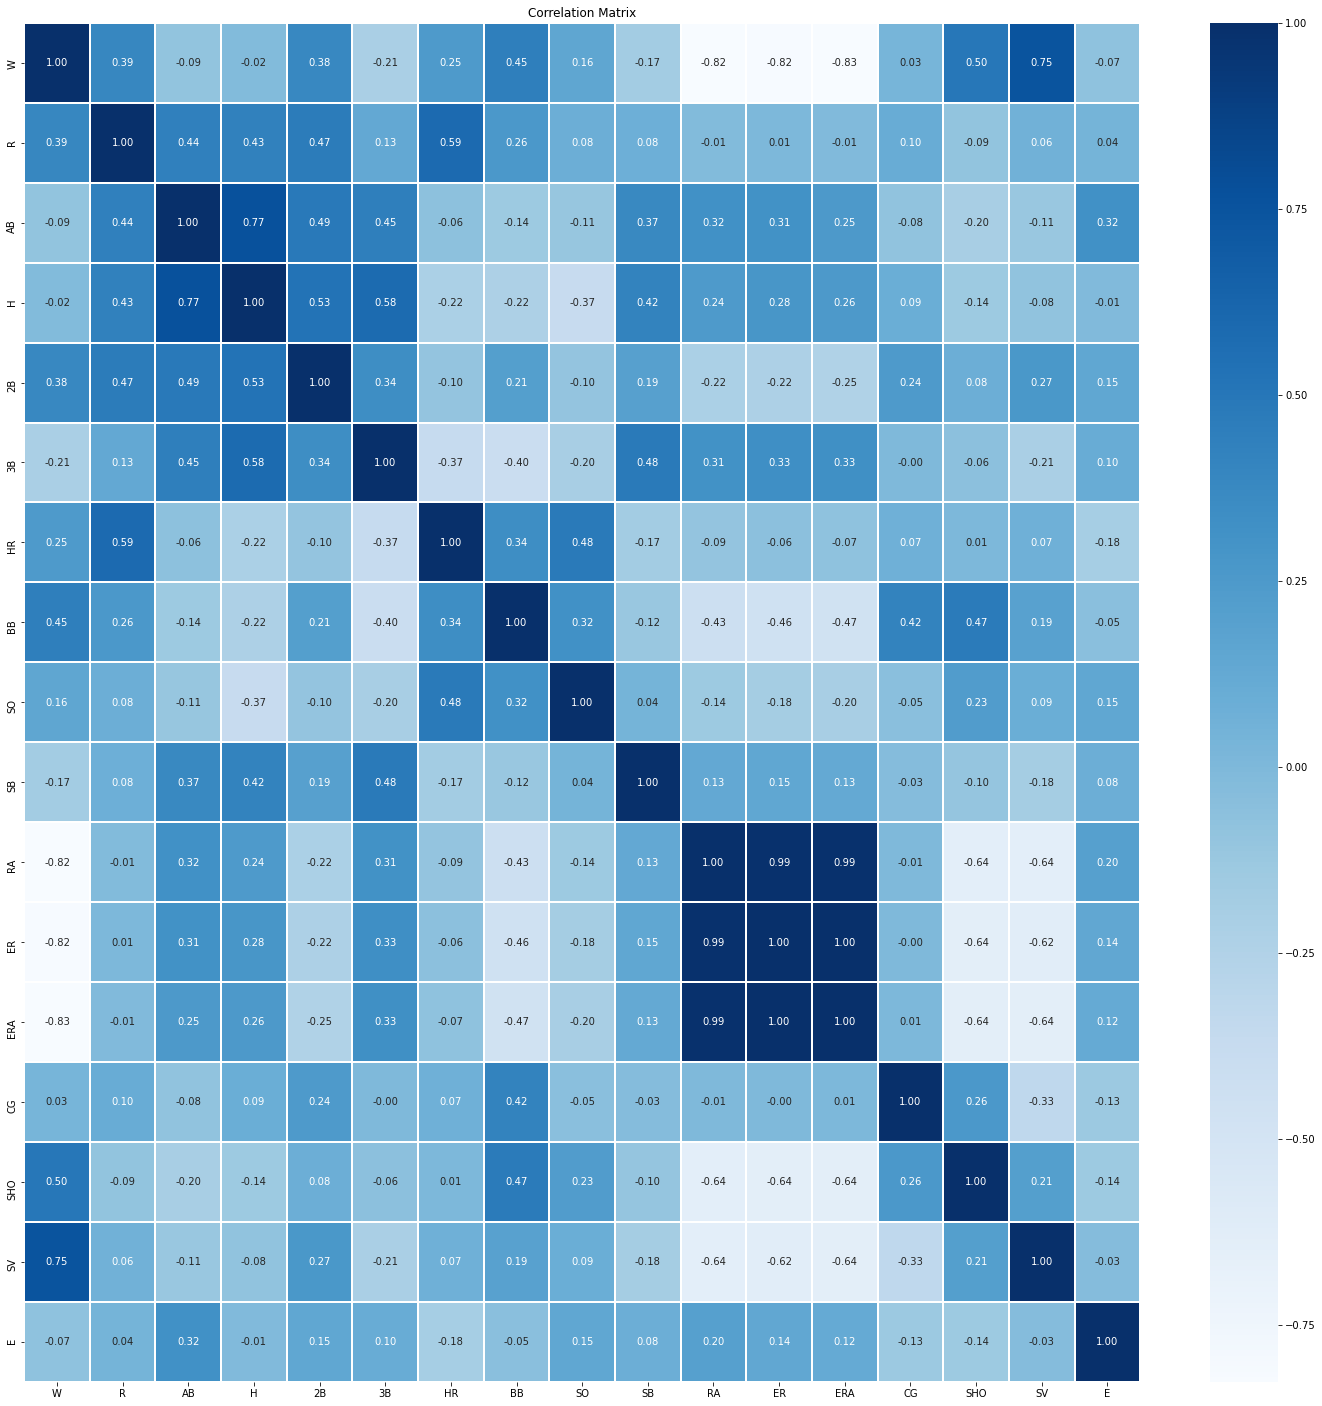

In [15]:
corr = df.corr()
plt.figure(figsize = (25,25))
sns.heatmap(corr, cmap= 'Blues',annot = True,fmt = '.2f',linewidths = 1.0)
plt.title("Correlation Matrix")
plt.show()

In [16]:
df = df.drop(columns = ['ERA'],axis = 1)

In [28]:
df = df.sample(frac =1)   # shuffling the data

Splitting X and y variables

In [29]:
x = df.drop(columns = ['W'],axis = 1)
y = df['W']

In [30]:
# scaling the function in order to equalize the range of other values.

scaler = StandardScaler()  
X = scaler.fit_transform(x)

In [31]:
x_train,x_test,y_train,y_test = train_test_split(X,y, test_size = 0.25, random_state = 505)

## Model Building :

    Next we are going to the important and intersting part ie.. MODEL BUILDING.
Here we will try building model of 4 -5 and will check the accuracy (score) of the model and then we will check over-fit and under-fit of the model and try to do hyper parameter tune for increase the efficiency of the model.

Model 1 : Random Forest Regressor()

In [61]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)

mse = mean_squared_error(y_test,y_pred)
print("MSE", mse)
print("RMSE", np.sqrt(mse))
print("Train Score", rf.score(x_train,y_train))
print("Test Score", rf.score(x_test,y_test))

MSE 34.651962499999996
RMSE 5.886591755846501
Train Score 0.9290331349039993
Test Score 0.6175675806173478


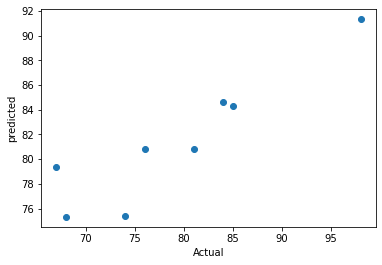

In [62]:
plt.scatter(y_test,y_pred)
plt.xlabel("Actual")
plt.ylabel("predicted")
plt.show()

Model 2 : Linear Regression()

In [63]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)

mse = mean_squared_error(y_test,y_pred)
print("MSE", mse)
print("RMSE", np.sqrt(mse))
print("Train Score", lr.score(x_train,y_train))
print("Test Score", lr.score(x_test,y_test))

MSE 72.28863498602675
RMSE 8.502272342499195
Train Score 0.9782084198203971
Test Score 0.20219475097332096


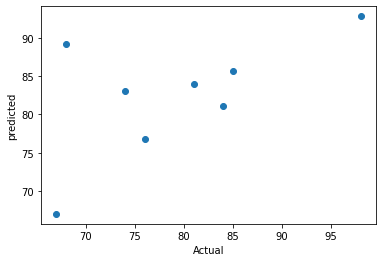

In [64]:
plt.scatter(y_test,y_pred)
plt.xlabel("Actual")
plt.ylabel("predicted")
plt.show()

Model 3 : Ada Boost Regressor()

In [65]:
from sklearn.ensemble import AdaBoostRegressor

abr = AdaBoostRegressor()
abr.fit(x_train,y_train)
y_pred = abr.predict(x_test)


mse = mean_squared_error(y_test, y_pred)
print("RMSE :", np.sqrt(mse))
print("R2 Score", r2_score(y_test, y_pred))
print("Train Data score:" , abr.score(x_train,y_train))
print("Test On TrainDataSet score:" ,  abr.score(x_test,y_test))

RMSE : 5.173466627363556
R2 Score 0.7046138223065279
Train Data score: 0.9960736144881361
Test On TrainDataSet score: 0.7046138223065279


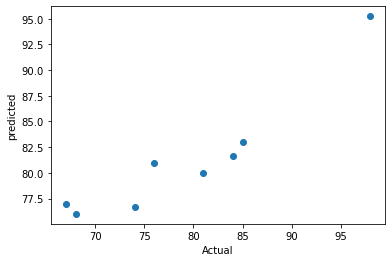

In [66]:
plt.scatter(y_test,y_pred)
plt.xlabel("Actual")
plt.ylabel("predicted")
plt.show()

Model 4 : K Neighbors Regressor()

In [67]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics

knr = KNeighborsRegressor(n_neighbors = 5)
knr.fit(x_train,y_train)
y_pred = knr.predict(x_test)

print("r2_Score", r2_score(y_test,y_pred))
print("MSE",metrics.mean_squared_error(y_test,y_pred))
print("RMSE",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print("Train Score", knr.score(x_train,y_train))
print("Test Score", knr.score(x_test,y_test))

r2_Score 0.6223348853250562
MSE 34.219999999999985
RMSE 5.849786320883865
Train Score 0.6755713926385513
Test Score 0.6223348853250562


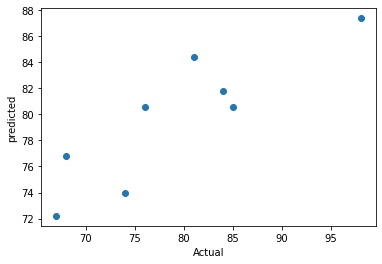

In [68]:
plt.scatter(y_test,y_pred)
plt.xlabel("Actual")
plt.ylabel("predicted")
plt.show()

As we trained all the model and got the test and train score, We will check whether the model is over-fit or under-fit using cross_val_score() method.

In [69]:
score1 = np.mean(cross_val_score(rf,x,y, cv = 5))  
print("random Forest", score1)

random Forest 0.587805655966217


In [70]:
score2 = np.mean(cross_val_score(lr,x,y, cv = 5)) 
print("Linear", score2)

Linear 0.49532231924366654


In [71]:
score3 = np.mean(cross_val_score(abr,x,y, cv = 5))  
print("Ada Boost", score3)

Ada Boost 0.49906687810350325


In [72]:
score5 = np.mean(cross_val_score(knr,x,y, cv = 5)) 
print("KNR", score5)

KNR 0.3164854915429892


After applying cross validation score method, I am choosing the best model as "RANDOM FOREST REGRESSOR" and I have choosen the best model based on the difference between model score and cross_val_Score and model which is having less % differnece is taken as best model.


Then next step is to apllying hyper parameter tuning to increase the over all efficiency of the model,

In [78]:
param = {'n_estimators': [100], 'criterion':['mse'], 'max_depth':[2,4,6,8,10,12], 
         'min_samples_split':[2], 'min_samples_leaf':[1],
      'max_features':['auto'], 'max_leaf_nodes':[3,6,9,12,15],'random_state':[555],
          'max_samples':[2,4,6,8,10,12,]
        }

In [79]:
gs = GridSearchCV(rf, param_grid = param, cv = 5)

In [80]:
gs.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse'],
                         'max_depth': [2, 4, 6, 8, 10, 12],
                         'max_features': ['auto'],
                         'max_leaf_nodes': [3, 6, 9, 12, 15],
                         'max_samples': [2, 4, 6, 8, 10, 12],
                         'min_samples_leaf': [1], 'min_samples_split': [2],
                         'n_estimators': [100], 'random_state': [555]})

In [81]:
gs.best_params_

{'criterion': 'mse',
 'max_depth': 4,
 'max_features': 'auto',
 'max_leaf_nodes': 9,
 'max_samples': 8,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100,
 'random_state': 555}

In [87]:
model = RandomForestRegressor(n_estimators = 50, criterion = 'mse',random_state = 555,max_depth =12 ,
                          min_samples_split = 2, min_samples_leaf=1,max_features= 'auto',max_leaf_nodes = 12,max_samples= 12)
model.fit(x_train,y_train)
Pred = model.predict(x_test)

print("r2_Score", r2_score(y_test,Pred))
print("MSE",metrics.mean_squared_error(y_test,Pred))
print("RMSE",np.sqrt(metrics.mean_squared_error(y_test,Pred)))
print("Train Score", model.score(x_train,y_train))
print("Test Score", model.score(x_test,y_test))

r2_Score 0.6233005690636314
MSE 34.13250000000002
RMSE 5.842302628245136
Train Score 0.8560224364886391
Test Score 0.6233005690636314


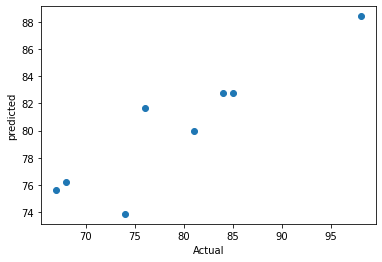

In [88]:
plt.scatter(y_test,Pred)
plt.xlabel("Actual")
plt.ylabel("predicted")
plt.show()

We can see our model has increased the efficiency to 62% and from the graph we can see the number of residuals are near to the best fit line and graph is linear.

Saving the model .pkl file

In [89]:
import joblib
joblib.dump(model,"Baseball.pkl")

['Baseball.pkl']